In [237]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hvplot.pandas  
import holoviews as hv



In [238]:
data = pd.read_csv('/Users/perezopoku/Desktop/Programme/Portoflio Projekte/EU Energy/Data/entsoe_data_2024_2025.csv')
data.head()

,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
0,2024-01-01 00:00:00+01:00,CZ,0.10,3707.0,238.0,0.0,23.0,NaN,83.0,NaN,...,NaN,NaN,NaN,40.0,79.0,530.0,451.0,NaN,53.0,273.0
1,2024-01-01 01:00:00+01:00,CZ,0.01,3730.0,238.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,94.0,79.0,530.0,451.0,NaN,53.0,274.0
2,2024-01-01 02:00:00+01:00,CZ,0.02,3755.0,238.0,0.0,22.0,NaN,86.0,NaN,...,NaN,NaN,NaN,336.0,79.0,531.0,452.0,NaN,53.0,274.0
3,2024-01-01 03:00:00+01:00,CZ,0.00,3819.0,239.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,956.0,80.0,492.0,412.0,NaN,53.0,273.0
4,2024-01-01 04:00:00+01:00,CZ,-0.01,3823.0,240.0,0.0,23.0,NaN,86.0,NaN,...,NaN,NaN,NaN,1096.0,80.0,487.0,407.0,NaN,54.0,271.0


## EDA


Wir haben stündliche Updates vieler EU Staaten 

In [239]:
for columns in data.columns:
    print(columns)

datetime
country
price
nuclear
fossil_gas
solar
waste
wind_offshore
wind_onshore
_biomass_actual_aggregated_
_fossil_brown_coal_lignite_actual_aggregated_
_fossil_coal_derived_gas_actual_aggregated_
_fossil_gas_actual_aggregated_
_fossil_hard_coal_actual_aggregated_
_fossil_oil_actual_aggregated_
_hydro_pumped_storage_actual_aggregated_
_hydro_pumped_storage_actual_consumption_
_hydro_run_of_river_and_poundage_actual_aggregated_
_hydro_water_reservoir_actual_aggregated_
_other_actual_aggregated_
_other_renewable_actual_aggregated_
_solar_actual_aggregated_
_wind_onshore_actual_aggregated_
biomass
energy_storage
fossil_brown_coal_lignite
fossil_coal_derived_gas
fossil_hard_coal
fossil_oil
fossil_oil_shale
fossil_peat
geothermal
hydro_pumped_storage
hydro_run_of_river_and_poundage
hydro_total
hydro_water_reservoir
marine
other
other_renewable


In [240]:
data.shape

(301391, 39)

In [241]:
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)


In [242]:
data.country.unique() 
Country = mapping = {
    'CZ': 'Czech Republic',
    'DE_LU': 'Germany & Luxembourg',
    'SK': 'Slovakia',
    'PL': 'Poland',
    'AT': 'Austria',
    'HU': 'Hungary',
    'FR': 'France',
    'ES': 'Spain',
    'PT': 'Portugal',
    'BE': 'Belgium',
    'NL': 'Netherlands',
    'DK_1': 'Denmark (West)',
    'IT_NORD': 'Italy (North)',
    'HR': 'Croatia',
    'SI': 'Slovenia',
    'IE_SEM': 'Ireland & Northern Ireland',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'EE': 'Estonia',
    'CH': 'Switzerland',
    'RO': 'Romania',
    'NO_3': 'Norway (Zone 3)',
    'SE_4': 'Sweden (Zone 4)'
}

data['country'] = data['country'].map(Country)
data.head(
)


,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
0,2023-12-31 23:00:00+00:00,Czech Republic,0.10,3707.0,238.0,0.0,23.0,NaN,83.0,NaN,...,NaN,NaN,NaN,40.0,79.0,530.0,451.0,NaN,53.0,273.0
1,2024-01-01 00:00:00+00:00,Czech Republic,0.01,3730.0,238.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,94.0,79.0,530.0,451.0,NaN,53.0,274.0
2,2024-01-01 01:00:00+00:00,Czech Republic,0.02,3755.0,238.0,0.0,22.0,NaN,86.0,NaN,...,NaN,NaN,NaN,336.0,79.0,531.0,452.0,NaN,53.0,274.0
3,2024-01-01 02:00:00+00:00,Czech Republic,0.00,3819.0,239.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,956.0,80.0,492.0,412.0,NaN,53.0,273.0
4,2024-01-01 03:00:00+00:00,Czech Republic,-0.01,3823.0,240.0,0.0,23.0,NaN,86.0,NaN,...,NaN,NaN,NaN,1096.0,80.0,487.0,407.0,NaN,54.0,271.0


In [243]:
data.country.unique()

array(['Czech Republic', 'Germany & Luxembourg', 'Slovakia', 'Poland',
       'Austria', 'Hungary', 'France', 'Spain', 'Portugal', 'Belgium',
       'Netherlands', 'Denmark (West)', 'Italy (North)', 'Croatia',
       'Slovenia', 'Ireland & Northern Ireland', 'Latvia', 'Lithuania',
       'Estonia', 'Switzerland', 'Romania', 'Norway (Zone 3)',
       'Sweden (Zone 4)'], dtype=object)

In [244]:
data.isnull().sum()

datetime                                                    0
country                                                     0
price                                                      22
nuclear                                                170375
fossil_gas                                              32394
solar                                                   26302
waste                                                  104912
wind_offshore                                          209678
wind_onshore                                             6192
_biomass_actual_aggregated_                            288288
_fossil_brown_coal_lignite_actual_aggregated_          288288
_fossil_coal_derived_gas_actual_aggregated_            288288
_fossil_gas_actual_aggregated_                         288288
_fossil_hard_coal_actual_aggregated_                   288288
_fossil_oil_actual_aggregated_                         288288
_hydro_pumped_storage_actual_aggregated_               288288
_hydro_p

# The Data provides a Time Series for each Energy Zone

We can further seperate each time Series for common patterns, and Trends which seem to happen across the EU
we can further differentitate bewteen clean and reneable Energy Sources and Fuel based Sources,



In [245]:
data_de = data[data['country'] == 'Germany & Luxembourg']
data_cz = data[data['country'] == 'Czech Republic']
data_sk = data[data['country'] == 'Slovakia']
data_pl = data[data['country'] == 'Poland']
data_at = data[data['country'] == 'Austria']
data_hu = data[data['country'] == 'Hungary']
data_fr = data[data['country'] == 'France']
data_es = data[data['country'] == 'Spain']
data_pt = data[data['country'] == 'Portugal']
data_be = data[data['country'] == 'Belgium']
data_nl = data[data['country'] == 'Netherlands']
data_dk = data[data['country'] == 'Denmark (West)']
data_it = data[data['country'] == 'Italy (North)']
data_hr = data[data['country'] == 'Croatia']
data_si = data[data['country'] == 'Slovenia']
data_ie = data[data['country'] == 'Ireland & Northern Ireland']
data_lv = data[data['country'] == 'Latvia']
data_lt = data[data['country'] == 'Lithuania']
data_ee = data[data['country'] == 'Estonia']
data_ch = data[data['country'] == 'Switzerland']
data_ro = data[data['country'] == 'Romania']
data_no = data[data['country'] == 'Norway (Zone 3)']
data_se = data[data['country'] == 'Sweden (Zone 4)']

print(data_de.shape)
print(data_cz.shape)
print(data_sk.shape)
print(data_pl.shape)
print(data_at.shape)
print(data_hu.shape)
print(data_fr.shape)
print(data_es.shape)
print(data_pt.shape)
print(data_be.shape)
print(data_nl.shape)
print(data_dk.shape)
print(data_it.shape)
print(data_hr.shape)
print(data_si.shape)
print(data_ie.shape)
print(data_lv.shape)
print(data_lt.shape)
print(data_ee.shape)
print(data_ch.shape)
print(data_ro.shape)
print(data_no.shape)
print(data_se.shape)



(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13103, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)


In [246]:
data_de.head()

,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
13104,2023-12-31 23:00:00+00:00,Germany & Luxembourg,0.10,NaN,2894.25,3.25,584.00,5679.25,29754.00,NaN,...,NaN,NaN,29.0,2512.75,1836.00,1984.25,148.25,NaN,152.00,113.0
13105,2024-01-01 00:00:00+00:00,Germany & Luxembourg,0.01,NaN,2824.50,3.00,569.25,5345.75,29660.50,NaN,...,NaN,NaN,28.5,2939.75,1849.25,1997.25,148.00,NaN,152.00,113.0
13106,2024-01-01 01:00:00+00:00,Germany & Luxembourg,0.00,NaN,2852.50,3.00,561.75,5188.50,29743.50,NaN,...,NaN,NaN,28.0,3455.25,1855.25,2017.50,162.25,NaN,152.00,113.0
13107,2024-01-01 02:00:00+00:00,Germany & Luxembourg,-0.01,NaN,2874.50,3.25,572.50,4674.25,29208.00,NaN,...,NaN,NaN,28.0,3418.50,1853.75,2026.75,173.00,NaN,152.25,113.0
13108,2024-01-01 03:00:00+00:00,Germany & Luxembourg,-0.03,NaN,2857.00,3.00,563.25,4439.25,29138.25,NaN,...,NaN,NaN,28.0,3458.00,1834.00,2048.25,214.25,NaN,152.00,113.0


As a german Student i will first analyze the german Energy market and later compare it to the EU, to understand and visualize more about the rest


In [247]:
data_de.isnull().sum()


datetime                                                   0
country                                                    0
price                                                      1
nuclear                                                13104
fossil_gas                                                 1
solar                                                      1
waste                                                      1
wind_offshore                                              1
wind_onshore                                               1
_biomass_actual_aggregated_                            13104
_fossil_brown_coal_lignite_actual_aggregated_          13104
_fossil_coal_derived_gas_actual_aggregated_            13104
_fossil_gas_actual_aggregated_                         13104
_fossil_hard_coal_actual_aggregated_                   13104
_fossil_oil_actual_aggregated_                         13104
_hydro_pumped_storage_actual_aggregated_               13104
_hydro_pumped_storage_ac

In [248]:
data_de = data_de.drop(columns=['nuclear','_fossil_brown_coal_lignite_actual_aggregated_','_fossil_coal_derived_gas_actual_aggregated_',
                                '_fossil_hard_coal_actual_aggregated_','_fossil_oil_actual_aggregated_','_fossil_gas_actual_aggregated_',
                                '_hydro_pumped_storage_actual_aggregated_','_hydro_pumped_storage_actual_consumption_',
                                '_hydro_run_of_river_and_poundage_actual_aggregated_','_hydro_water_reservoir_actual_aggregated_',
                                '_solar_actual_aggregated_','_wind_onshore_actual_aggregated_',
                                'fossil_oil_shale','fossil_peat','_other_actual_aggregated_','marine','energy_storage',
                                '_biomass_actual_aggregated_',"_other_renewable_actual_aggregated_"])
data_de.head()

,datetime,country,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
13104,2023-12-31 23:00:00+00:00,Germany & Luxembourg,0.10,2894.25,3.25,584.00,5679.25,29754.00,3945.50,3391.75,455.75,1860.75,398.00,29.0,2512.75,1836.00,1984.25,148.25,152.00,113.0
13105,2024-01-01 00:00:00+00:00,Germany & Luxembourg,0.01,2824.50,3.00,569.25,5345.75,29660.50,3908.75,3372.75,419.00,1854.75,398.00,28.5,2939.75,1849.25,1997.25,148.00,152.00,113.0
13106,2024-01-01 01:00:00+00:00,Germany & Luxembourg,0.00,2852.50,3.00,561.75,5188.50,29743.50,3893.00,3373.50,420.00,1828.75,398.00,28.0,3455.25,1855.25,2017.50,162.25,152.00,113.0
13107,2024-01-01 02:00:00+00:00,Germany & Luxembourg,-0.01,2874.50,3.25,572.50,4674.25,29208.00,3868.00,3393.00,426.75,1817.50,397.50,28.0,3418.50,1853.75,2026.75,173.00,152.25,113.0
13108,2024-01-01 03:00:00+00:00,Germany & Luxembourg,-0.03,2857.00,3.00,563.25,4439.25,29138.25,3872.50,3393.75,402.75,1832.75,397.75,28.0,3458.00,1834.00,2048.25,214.25,152.00,113.0


Wir haben hier Spalten die nicht relevant sind wie Nuklear Strom welches es in Deutschlad so nicht mehr gibt, 
We also have a lot of other columns with no Content/Information

In [249]:
price0 = data_de[data_de['price'].isna()]
price0

,datetime,country,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
21864,2024-12-30 23:00:00+00:00,Germany & Luxembourg,NaN,8649.5,7.25,756.0,1914.0,19804.0,4177.75,7793.5,396.0,4097.75,380.0,34.0,810.0,1367.75,1585.75,218.0,236.75,100.75


In [250]:
data_de.describe()


,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
count,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13104.000000,13103.000000,13103.000000,13103.000000
mean,82.515013,6669.306298,7923.698034,708.458521,2832.281539,12395.118764,4159.636966,8018.880791,507.255673,3273.075180,356.009807,25.168244,2712.959055,1697.886515,1887.040999,189.298500,181.153782,92.389173
std,54.392260,3790.938598,11879.294037,131.183216,1912.141199,9691.566664,337.773702,3214.672821,102.547145,2129.945142,93.675368,5.813033,1568.787533,271.071428,386.770646,192.132246,59.669251,18.420297
min,-250.320000,1351.250000,0.000000,0.000000,0.000000,47.000000,3220.000000,1948.750000,125.500000,237.250000,37.000000,6.000000,78.750000,1011.000000,0.000000,0.000000,111.000000,50.000000
25%,57.955000,3613.375000,6.750000,636.125000,1121.875000,4840.750000,3918.625000,5166.625000,446.750000,1497.875000,319.000000,21.000000,1310.375000,1473.000000,1588.500000,54.000000,137.000000,81.750000
50%,84.360000,5897.500000,327.000000,725.500000,2589.750000,9787.500000,4130.500000,8283.000000,507.500000,2770.000000,365.000000,26.000000,2486.750000,1733.250000,1885.000000,120.250000,163.000000,89.250000
75%,109.100000,8754.250000,12971.875000,806.750000,4442.125000,17806.000000,4388.625000,10648.625000,580.500000,4912.625000,374.500000,30.000000,4017.375000,1914.000000,2134.062500,251.500000,221.000000,100.250000
max,936.280000,20161.500000,52084.500000,964.750000,7901.500000,46510.750000,5284.750000,17173.250000,786.000000,11833.250000,1343.000000,36.000000,6996.750000,2313.000000,3095.250000,1029.750000,332.000000,176.000000


In [251]:
#german energy size

energy_de = data_de.drop(columns=['price','country','datetime'])
means = energy_de.mean().sort_values()
print(means)

    

geothermal                            25.168244
other_renewable                       92.389173
other                                181.153782
hydro_water_reservoir                189.298500
fossil_oil                           356.009807
fossil_coal_derived_gas              507.255673
waste                                708.458521
hydro_run_of_river_and_poundage     1697.886515
hydro_total                         1887.040999
hydro_pumped_storage                2712.959055
wind_offshore                       2832.281539
fossil_hard_coal                    3273.075180
biomass                             4159.636966
fossil_gas                          6669.306298
solar                               7923.698034
fossil_brown_coal_lignite           8018.880791
wind_onshore                       12395.118764
dtype: float64


In [252]:
for i in means:
    print(f"{(i/ means.sum())*100:.5f}%" ) 






0.04693%
0.17227%
0.33779%
0.35297%
0.66383%
0.94585%
1.32102%
3.16595%
3.51865%
5.05870%
5.28119%
6.10311%
7.75623%
12.43586%
14.77485%
14.95234%
23.11245%


In [253]:
percentages = (means / means.sum() * 100)
print(f"\nSumme: {percentages.sum():.5f}%")


Summe: 100.00000%


In [254]:
#typical energy production in Germany:

total = means.sum()
print(f"Total energy production in Germany: {total:.2f} MW")

Total energy production in Germany: 53629.62 MW


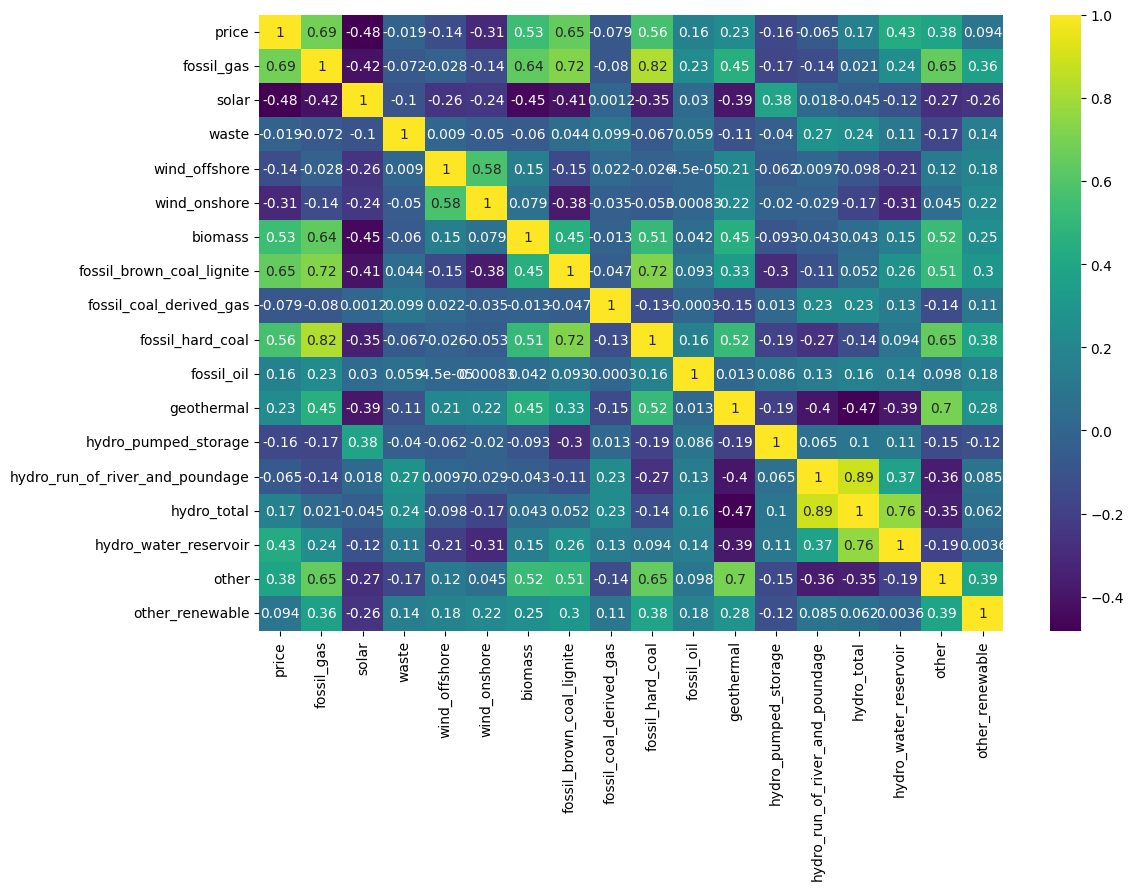

In [255]:
numeric_data_de = data_de.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))

sns.heatmap(numeric_data_de.corr(), annot=True, cmap='viridis')
plt.show()



- Great Korrelation between fossil Gas and fossil hard coal 
- other and geothermal we have to look into what that instills a little more,
- hydro and hydro, water resovoir
- bio mass and solar

In [256]:
data_de.dtypes

datetime                           datetime64[ns, UTC]
country                                         object
price                                          float64
fossil_gas                                     float64
solar                                          float64
waste                                          float64
wind_offshore                                  float64
wind_onshore                                   float64
biomass                                        float64
fossil_brown_coal_lignite                      float64
fossil_coal_derived_gas                        float64
fossil_hard_coal                               float64
fossil_oil                                     float64
geothermal                                     float64
hydro_pumped_storage                           float64
hydro_run_of_river_and_poundage                float64
hydro_total                                    float64
hydro_water_reservoir                          float64
other     

In [280]:
# Nach Tag aggregieren (Durchschnittspreis pro Tag)
data_daily = data_de.set_index('datetime').resample('D')[['price',
    "fossil_gas",
    "solar",
    "waste",
    "wind_offshore",
    "wind_onshore",
    "biomass",
    "fossil_brown_coal_lignite",
    "fossil_coal_derived_gas",
    "fossil_hard_coal",
    "fossil_oil",
    "geothermal",
    "hydro_pumped_storage",
    "hydro_run_of_river_and_poundage",
    "hydro_total",
    "hydro_water_reservoir",
    "other",
    "other_renewable"]].mean().reset_index()

# Plot erstellen
price = data_daily.hvplot.line(
    x='datetime',
    y='price',
    title='German Electricity Price 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Price in €/MWh',
    width=1200,
    height=500,
    line_width=2,
    color='#1f77b4'
)
zero_line = hv.HLine(0).opts(
    color='black', 
    line_dash='dashed', 
    line_width=2,
    alpha=0.7
)
price* zero_line

:Overlay
   .Curve.I :Curve   [datetime]   (price)
   .HLine.I :HLine   [x,y]

In [268]:
#price vs fossil_gas
price_gas = data_de.hvplot.scatter(x='fossil_gas', y='price', title=' Price vs Fossil_Gas production',
                                   xlabel='Fossil_Gas Production in MW', ylabel='Price in €/MWh (total)', color='#ff7f0e', size=50, alpha=0.6)
price_gas

# NaN-Werte entfernen
valid_data = data_de[['fossil_gas', 'price']].dropna()

x = valid_data['fossil_gas'].values
y = valid_data['price'].values

# Lineare Regression (Polynom 1. Grades)
coefficients = np.polyfit(x, y, 1)  # [slope, intercept]
regression_line = np.poly1d(coefficients)

# x-Werte für die Linie
x_line = np.linspace(x.min(), x.max(), 100)
y_line = regression_line(x_line)

# Scatter Plot
price_gas = data_de.hvplot.scatter(
    x='fossil_gas', y='price', 
    title='Price vs Fossil Gas Production',
    xlabel='Fossil Gas Production (MW)', 
    ylabel='Price (€/MWh)',
    color='#ff7f0e', size=1, alpha=0.6
)

# Regressionsgerade
reg_df = pd.DataFrame({'fossil_gas': x_line, 'price': y_line})
regression = reg_df.hvplot.line(
    x='fossil_gas', y='price', 
    color='red', line_width=3, 
    label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
)

# Kombinieren
plot = price_gas * regression * zero_line
plot

:Overlay
   .Scatter.I                                           :Scatter   [fossil_gas]   (price)
   .Curve.Y_equals_0_full_stop_01x_plus_16_full_stop_83 :Curve   [fossil_gas]   (price)

We can see a clear correlation between higher fossil gas Production and the prices with cases of alot of production maybe even leading or correlating to a very high increase of of the Price

it does also seem to correlate heavily with fossil

In [281]:
fossils = data_daily.hvplot.line(
    x='datetime',
    y=['fossil_gas','fossil_brown_coal_lignite','fossil_hard_coal'],
    title='German Fossil Gas Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Fossil Gas Production',
    width=1200,
    height=500,

)
fossils =fossils * zero_line
fossils

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [datetime]   (value)
   .HLine.I     :HLine   [x,y]

In [260]:
wind = data_daily.hvplot.line(
    x='datetime',
    y=['wind_onshore','wind_offshore'],
    title='German Wind Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Wind Production',
    width=1200,
    height=500,
)


wind

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

In [261]:
import holoviews as hv
import hvplot.pandas

solar = data_daily.hvplot.line(
    x='datetime',
    y=['solar'],
    title='German Solar Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Solar Production (MW)',
    width=1200,
    height=500,
    grid=True
)



solar_plot = solar * zero_line
solar_plot

:Overlay
   .Curve.I :Curve   [datetime]   (solar)
   .HLine.I :HLine   [x,y]

In [262]:
data_daily['fossils'] = data_daily['fossil_gas'] + data_daily['fossil_brown_coal_lignite'] + data_daily['fossil_hard_coal']


fossils_plot = data_daily.hvplot.line(
    x='datetime',
    y='fossils',
    title='German Total Fossil Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Total Fossil Production (MW)',
    width=1200,
    height=500)

fossils_plot = fossils_plot
fossils_plot * solar_plot

#a = solar * fossils * zero_line


:Overlay
   .Curve.I  :Curve   [datetime]   (fossils)
   .Curve.II :Curve   [datetime]   (solar)
   .HLine.I  :HLine   [x,y]

In [279]:
print(data_de.price.mean())
print(data_de.price.max())
print(data_de.solar.mean())
print(data_de.solar.max())


82.51501335572006
936.28
7923.698033529216
52084.5


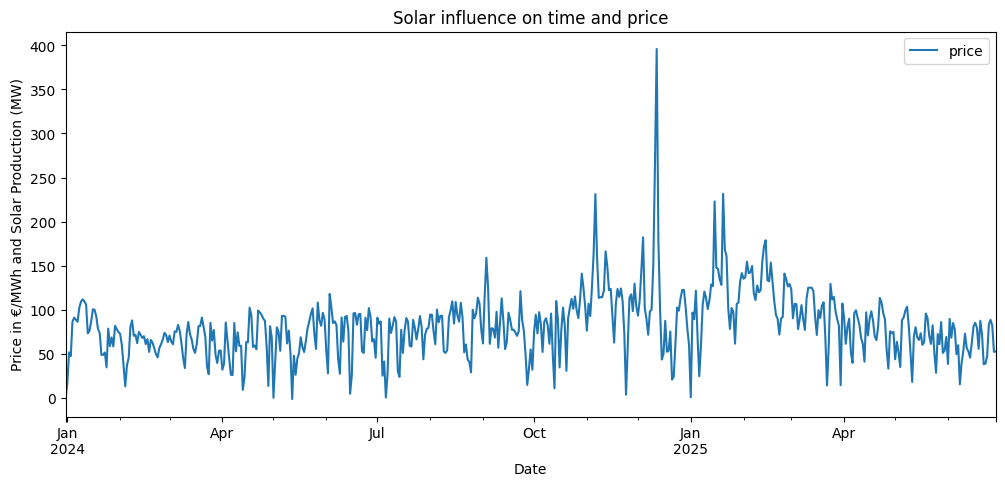

In [285]:
#zeit vs (preis vs solar)
price = data_daily.price * 5
ax = data_daily.plot(
    x='datetime',
    y='price',
    title='Solar influence on time and price',
    xlabel='Date',
    ylabel='Price in €/MWh and Solar Production (MW)',
    figsize=(12, 5)
)

bx = data_daily.plot(
    x='datetime',
    y='solar',
    ax=ax,
    secondary_y=True,
    color='orange'
)
plt.show()

In [274]:
"""#solar vs price 
solar_price = data_de.hvplot.scatter(x='solar', y='price', title=' Price vs Solar production',
                                   xlabel='Solar Production in MW', ylabel='Price in €/MWh (total)', size=0.5, alpha=0.6)

reg_df = pd.DataFrame({'solar': x_line, 'price': y_line})

x_line = np.linspace(data_de['solar'].min(), data_de['solar'].max(), 100)
y_line = polynomial(x_line)

reg_df = pd.DataFrame({'solar': x_line, 'price': y_line})
regression = reg_df.hvplot.line(
    x='solar', 
    y='price', 
    color='red', 
    line_width=3, 
    label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
)


price_solar=solar_price * regression * zero_line
price_solar"""

NameError: name 'polynomial' is not defined